In [31]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [36]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session= Session(engine)
connection= engine.connect()

# Exploratory Precipitation Analysis

In [39]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = str(recent_date)[2:-3]
print(recent_date)

2017-08-23


In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
year_prior = str(eval(recent_date[0:4])-1) + recent_date[4:]
print(recent_date)


2017-08-23


In [41]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_prior).filter(Measurement.date <= recent_date).order_by(Measurement.date).all()

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_prcp_df = pd.DataFrame(data=year_prcp)

year_prcp_df.rename(columns={0 : "date"}, inplace=True)
year_prcp_df.rename(columns={1 : "precipitation"}, inplace=True)

year_prcp_df.set_index("date", inplace=True)
year_prcp_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [43]:
print(year_prcp_df)

            precipitation
date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
...                   ...
2017-08-22           0.50
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]


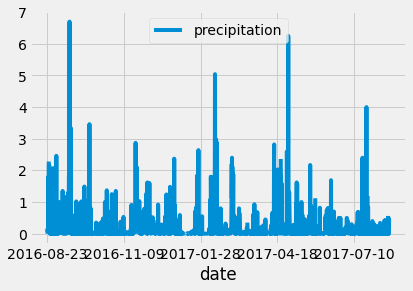

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data
year_prcp_df.plot()
plt.legend(loc=9)
plt.savefig("precipitation_analysis.png")
plt.show()


In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
station = session.query(func.count(Station.station))
station_count = station[0]
station_count

(9,)

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs))\
             .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
num1_station = active_stations[0][0]

stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == num1_station)
                      
stats_list=list(stats)
print(stats_list)

[(54.0, 85.0, 71.66378066378067)]


In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

year_temps_tops = session.query(Measurement.tobs)\
.filter(Measurement.date >= year_prior)\
.filter(Measurement.date <= recent_date)\
.filter(Measurement.station == num1_station)\

temp_list = []
for year_temps_top in year_temps_tops:
    temp_list.append(year_temps_top[0])

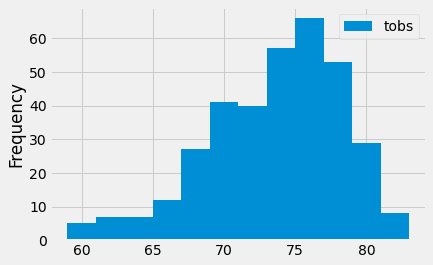

<Figure size 432x288 with 0 Axes>

In [51]:
#plot the results as a histogram
fig = plt.figure()
plt.hist(temp_list, bins=12 , label='tobs')
plt.ylabel("Frequency")
plt.legend(loc=1)
plt.show()
plt.savefig("station_observation_analysis.png")

# Close session

In [52]:
# Close Session
session.close()